In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

die_rolls = pd.read_csv('die-rolls.csv')

# A fair dice has six-faces having numbers [1-6]. 
# There are 100 dices, and two trials were conducted.
# In each trial, all 100 dices were rolled down, and the outcome [1-6] was recorded.
# The `Sum` column represents the sum of the outcomes in the two trials, for each given dice. 
die_rolls.head(10)

,Dice,Trial 1,Trial 2,Sum
0,1,4,1,5
1,2,4,5,9
2,3,2,6,8
3,4,6,3,9
4,5,3,6,9
5,6,6,6,12
6,7,3,3,6
7,8,3,2,5
8,9,2,6,8
9,10,6,6,12


### Example 1. Shifting the edges of the bars can remove ambiguity in the case of Discrete data

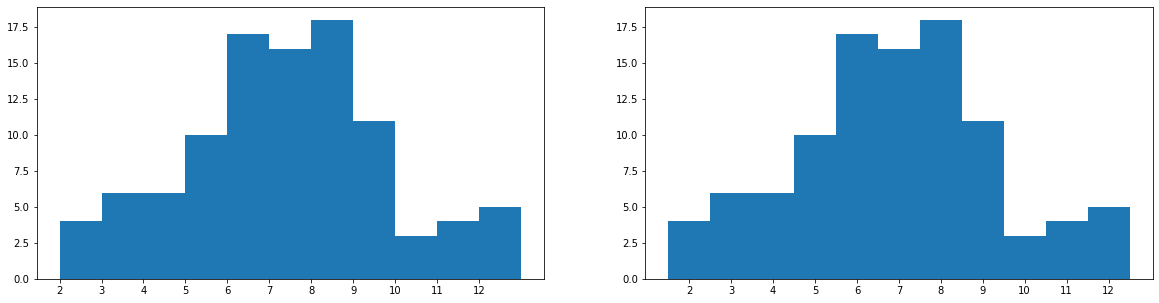

In [3]:
plt.figure(figsize = [20, 5])

# Histogram on the left, bin edges on integers
plt.subplot(1, 2, 1)
bin_edges = np.arange(2, 12+1.1, 1) # note `+1.1`, see below
plt.hist(data=die_rolls, x='Sum', bins = bin_edges);
plt.xticks(np.arange(2, 12+1, 1));


# Histogram on the right, bin edges between integers
plt.subplot(1, 2, 2)
bin_edges = np.arange(1.5, 12.5+1, 1)
plt.hist(data=die_rolls, x='Sum', bins = bin_edges);
plt.xticks(np.arange(2, 12+1, 1));

### Example 2. Making gaps between individual bars


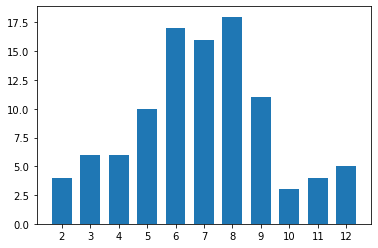

In [4]:
bin_edges = np.arange(1.5, 12.5+1, 1)
plt.hist(data=die_rolls, x='Sum', bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(2, 12+1, 1));

### Gaps between bars makes it clear that the data is discrete in nature.

By adding gaps between bars, you emphasize the fact that the data is discrete in value. On the other hand, plotting your quantitative data in this manner might cause it to be interpreted as ordinal-type data, which can have an effect on overall perception.

For continuous numeric data, you should not make use of the "rwidth" parameter, since the gaps imply discreteness of value. As another caution, it might be tempting to use seaborn's countplot function to plot the distribution of a discrete numeric variable as bars. Be careful about doing this, since each unique numeric value will get a bar, regardless of the spacing in values between bars. (For example, if the unique values were {1, 2, 4, 5}, missing 3, countplot would only plot four bars, with the bars for 2 and 4 right next to one another.) Also, even if your data is technically discrete numeric, you should probably not consider either of the variants depicted on this page unless the number of unique values is small enough to allow for the half-unit shift or discrete bars to be interpretable. If you have a large number of unique values over a large enough range, it's better to stick with the standard histogram than risk interpretability issues.

While you might justify plotting discrete numeric data using a bar chart, you’ll be less apt to justify the opposite: plotting ordinal data as a histogram. The space between bars in a bar chart helps to remind the reader that values are not contiguous in an ‘interval’-type fashion: only that there is an order in levels. With that space removed as in a histogram, it's harder to remember this important bit of interpretation.